
# 🚲 Laboratorio: Regresión Lineal - Predicción de Bicicletas Alquiladas

**Objetivo:** Aplicar regresión lineal para predecir el número de bicicletas alquiladas en un día.

---

## 1️⃣ Introducción

**Pregunta:** ¿Qué tipo de problemas se pueden resolver con regresión lineal?

> _La regresión lineal se usa para problemas donde queremos predecir un valor numérico continuo, como precios, temperatura, ventas o número de bicicletas alquiladas._



---
## 2️⃣ Carga del Dataset
Descargaremos el dataset y exploraremos su contenido.


In [ ]:

import pandas as pd

# Descargar dataset desde la URL oficial
!wget -q https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv

# Leer el archivo CSV
bike_data = pd.read_csv("daily-bike-share.csv")

# Mostrar las primeras filas
bike_data.head(5)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [ ]:

# Información general del dataset
print("\n📘 Información general del dataset:")
print(bike_data.info())

# Descripción estadística
print("\n📊 Descripción estadística:")
print(bike_data.describe())



📘 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB
None

📊 Descripción estadística:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000


**Pregunta:** ¿Qué variable queremos predecir?  
> Queremos predecir `rentals` (número total de bicicletas alquiladas).


In [ ]:

# Extraer día del mes desde la columna de fechas
bike_data["day"] = pd.to_datetime(bike_data["dteday"]).dt.day

# Mostrar las primeras 25 filas
bike_data.head(25)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10



---
## 3️⃣ Preparación de datos
Seleccionaremos las características numéricas más relevantes y la variable objetivo.


In [ ]:

# Seleccionar las características numéricas más relevantes
features = ["temp", "atemp", "hum", "windspeed"]
label = "rentals"

X = bike_data[features]
y = bike_data[label]

# Mostrar estadísticas descriptivas
print("\n📈 Estadísticas descriptivas de las variables:")
print(X.describe())

print("\n📉 Estadísticas del objetivo:")
print(y.describe())



📈 Estadísticas descriptivas de las variables:
             temp       atemp         hum   windspeed
count  731.000000  731.000000  731.000000  731.000000
mean     0.495385    0.474354    0.627894    0.190486
std      0.183051    0.162961    0.142429    0.077498
min      0.059130    0.079070    0.000000    0.022392
25%      0.337083    0.337842    0.520000    0.134950
50%      0.498333    0.486733    0.626667    0.180975
75%      0.655417    0.608602    0.730209    0.233214
max      0.861667    0.840896    0.972500    0.507463

📉 Estadísticas del objetivo:
count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64



---
## 4️⃣ Gráfica de datos
Visualizaremos la relación entre la temperatura y el número de bicicletas alquiladas.


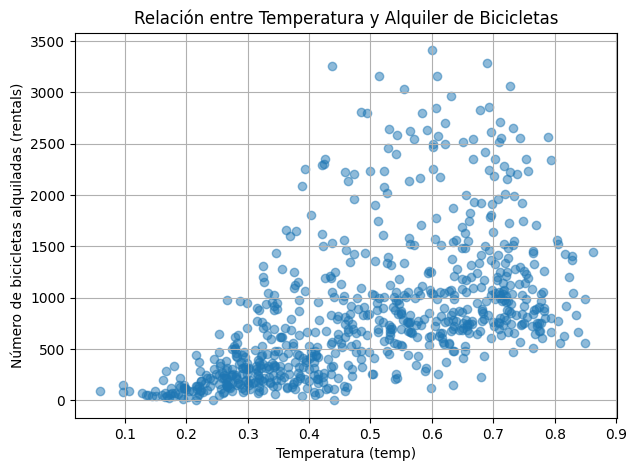

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(bike_data["temp"], bike_data["rentals"], alpha=0.5)
plt.xlabel("Temperatura (temp)")
plt.ylabel("Número de bicicletas alquiladas (rentals)")
plt.title("Relación entre Temperatura y Alquiler de Bicicletas")
plt.grid(True)
plt.show()



**Pregunta:** ¿Se observa alguna relación lineal?  
> Sí, parece haber una relación positiva: a mayor temperatura, más alquileres.



---
## 5️⃣ División en conjuntos de entrenamiento y prueba
Dividiremos los datos para entrenar y evaluar el modelo.


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")


Tamaño del conjunto de entrenamiento: 511
Tamaño del conjunto de prueba: 220



**Pregunta:** ¿Qué pasa si usamos un `test_size` demasiado pequeño?  
> El modelo podría no generalizar bien, ya que tendría muy pocos datos para evaluar su rendimiento.



---
## 6️⃣ Entrenamiento del modelo
Entrenaremos un modelo de regresión lineal multivariable.


In [ ]:

from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Mostrar los coeficientes
print("\n🧮 Coeficientes del modelo:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")
print("Intercepto (β₀):", model.intercept_)



🧮 Coeficientes del modelo:
temp: 1569.98
atemp: 485.13
hum: -617.31
windspeed: -1290.74
Intercepto (β₀): 468.4262644184328



**Ecuación del modelo:**  
\( rentals = β₀ + β₁·temp + β₂·atemp + β₃·hum + β₄·windspeed \)

**Pregunta:** ¿Cómo interpretas el coeficiente asociado a la temperatura?  
> Indica cuánto aumentan los alquileres cuando la temperatura sube en una unidad (manteniendo las demás constantes).



---
## 7️⃣ Evaluación del modelo
Evaluaremos la precisión del modelo con métricas y visualizaciones.



📏 Evaluación del modelo:
MSE: 354378.07
RMSE: 595.30
R²: 0.31


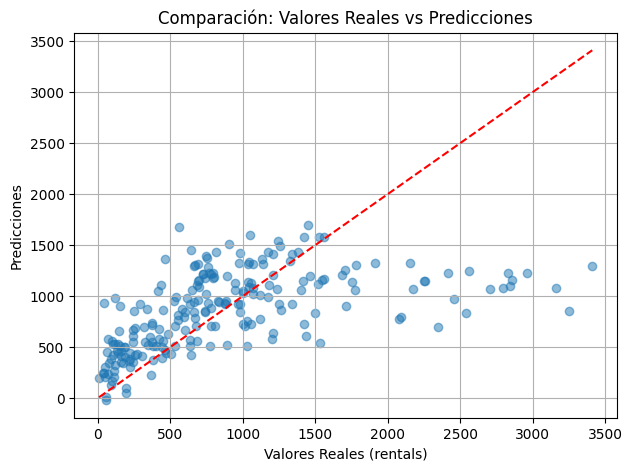

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predicciones
y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📏 Evaluación del modelo:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Gráfico de valores reales vs predichos
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores Reales (rentals)")
plt.ylabel("Predicciones")
plt.title("Comparación: Valores Reales vs Predicciones")
plt.grid(True)
plt.show()



**Pregunta:** ¿Qué información nos da el MSE y el RMSE?  
> El MSE mide el error cuadrático promedio. El RMSE (raíz cuadrada) indica el error promedio en la misma unidad de la variable objetivo.



---
## 8️⃣ Extensión / Reto
Entrenaremos un modelo con una sola variable (`temp`) y compararemos resultados.


In [ ]:

X_temp = bike_data[["temp"]]
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_temp, y, test_size=0.3, random_state=0)

model_temp = LinearRegression()
model_temp.fit(X_train_t, y_train_t)
y_pred_t = model_temp.predict(X_test_t)

mse_t = mean_squared_error(y_test_t, y_pred_t)
rmse_t = np.sqrt(mse_t)
r2_t = r2_score(y_test_t, y_pred_t)

print("\n📊 Modelo con solo temperatura:")
print(f"MSE: {mse_t:.2f}, RMSE: {rmse_t:.2f}, R²: {r2_t:.2f}")



📊 Modelo con solo temperatura:
MSE: 374482.80, RMSE: 611.95, R²: 0.27



**Pregunta:** ¿Cuál modelo es más preciso y por qué?  
> El modelo multivariable suele ser más preciso porque considera más factores que influyen en el número de alquileres.
